In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 

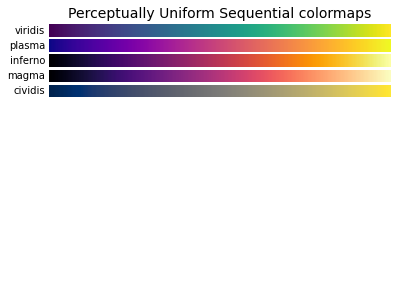

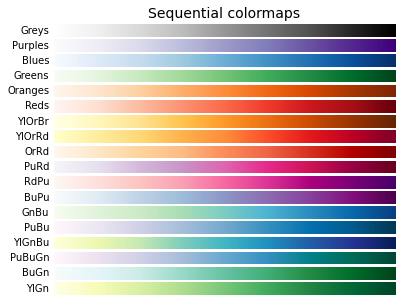

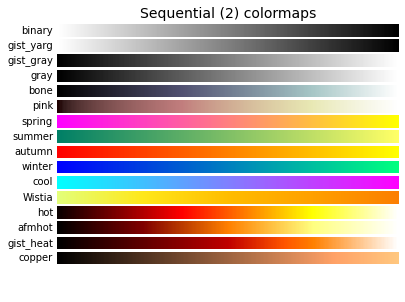

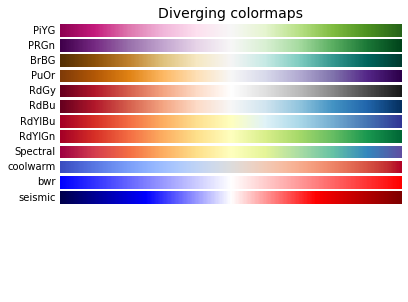

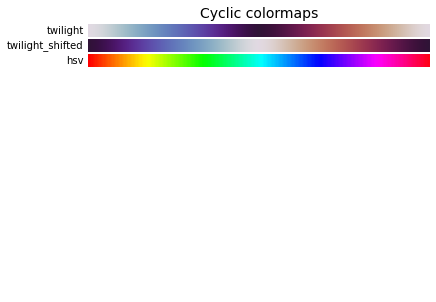

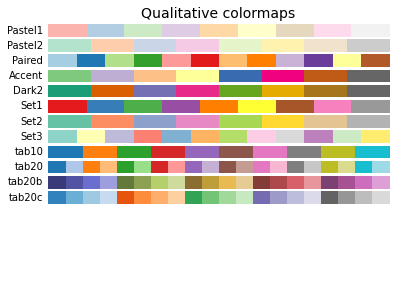

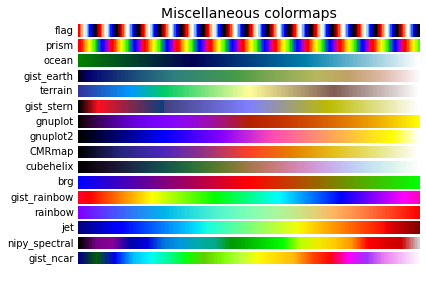

In [17]:
from collections import OrderedDict # import a specialized container datatype - ordered dictionary
cmaps = OrderedDict()

cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

cmaps['Sequential (2)'] = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']

cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

cmaps['Cyclic'] = ['twilight', 'twilight_shifted', 'hsv']

cmaps['Qualitative'] = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']

cmaps['Miscellaneous'] = [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']

nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps.items())
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()

for cmap_category, cmap_list in cmaps.items():
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()

In [20]:
motor_url = 'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD&bom=true&format=true'
#define column headers
motor_column_headers = ['CRASH DATE','CRASH TIME','BOROUGH','ZIP CODE','LATITUDE',
                        'LONGITUDE','LOCATION','ON STREET NAME','CROSS STREET NAME','OFF STREET NAME','NUMBER OF PERSONS INJURED',
                        'NUMBER OF PERSONS KILLED','NUMBER OF PEDESTRIANS INJURED','NUMBER OF PEDESTRIANS KILLED',
                        'NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST INJURED',
                        'NUMBER OF MOTORIST KILLED','CONTRIBUTING FACTOR VEHICLE 1','CONTRIBUTING FACTOR VEHICLE 2',
                        'CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4',
                        'CONTRIBUTING FACTOR VEHICLE 5','COLLISION_ID','VEHICLE TYPE CODE 1','VEHICLE TYPE CODE 2',
                        'VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5']
motor_df = pd.read_csv(motor_url, names = motor_column_headers)
print(motor_df)

C:\Users\Zoey\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3,4,5,10,11,12,13,14,15,16,17,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


         CRASH DATE  CRASH TIME    BOROUGH  ZIP CODE   LATITUDE   LONGITUDE  \
0        CRASH DATE  CRASH TIME    BOROUGH  ZIP CODE   LATITUDE   LONGITUDE   
1        12/26/2017       18:00        NaN       NaN    40.7099  -73.786736   
2        01/09/2018        7:45        NaN       NaN  40.738842   -73.81404   
3        01/11/2018       17:18        NaN       NaN   40.80785   -73.93185   
4        12/31/2017       16:00        NaN       NaN  40.710876   -74.01439   
...             ...         ...        ...       ...        ...         ...   
1714509  07/16/2012       20:18     QUEENS     11422    40.6753    -73.7321   
1714510  07/03/2012       12:30     QUEENS     11101    40.7338    -73.9374   
1714511  07/06/2012       11:30  MANHATTAN     10019    40.7605    -73.9837   
1714512  07/04/2012       13:15      BRONX     10453    40.8504     -73.907   
1714513  07/22/2012       23:45     QUEENS     11370    40.7577    -73.8858   

                          LOCATION                 

TypeError: 'value' must be an instance of str or bytes, not a float

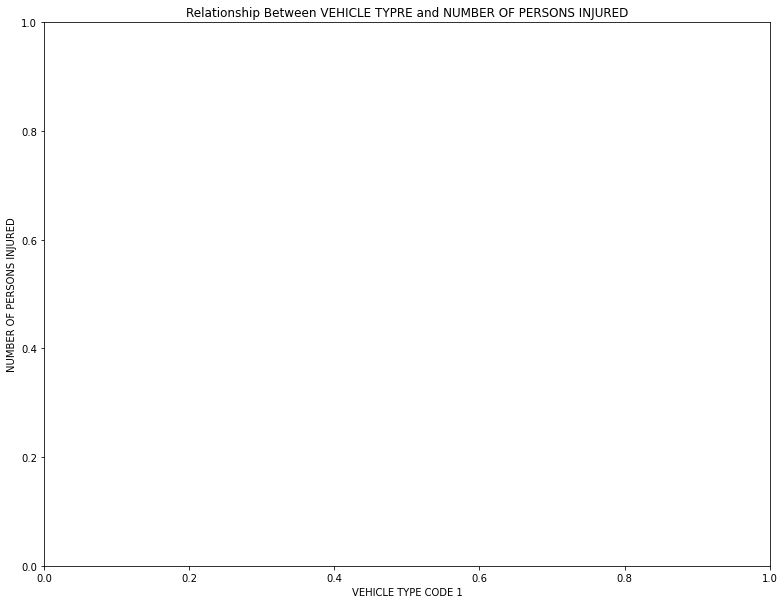

In [21]:
#figure
fig, ax1 = plt.subplots()
fig.set_size_inches(13, 10)

#labels
ax1.set_xlabel('VEHICLE TYPE CODE 1')
ax1.set_ylabel('NUMBER OF PERSONS INJURED')
ax1.set_title('Relationship Between VEHICLE TYPRE and NUMBER OF PERSONS INJURED')

#c sequence
c = motor_df['NUMBER OF PERSONS INJURED']

#plot
plt.scatter( motor_df['VEHICLE TYPE CODE 1'], motor_df['NUMBER OF PERSONS INJURED'] , c=c, 
            cmap = 'RdPu', alpha =0.5)
cbar = plt.colorbar()
cbar.set_label('NUMBER OF PERSONS INJURED')

In this assignment, i choose Motor Vehicle Collisions - CrashesPublic data and visulize them. It has 29 variables includes crash time which is time series data, location which is geographic data and vehicle type code which represents the categorical data, etc.
My first goal is try to make a bubble map in the The Data Visualisation Catalogue which shows the sum of the number of different types of injuries and killed and the location.The location with bigger number of killed and injuries is labeled by bigger bubble. The second goal is to draw a histogram to see if there is a relationship between CONTRIBUTING FACTOR VEHICLE and the number of killed and injuries. Contributing factors are labeled on x-axis and the numbers are labeled on y-axis so that we can figure out what kind of contributing factors causes the biggest number of killed and injuries. Also, my third goal is try to depict the relationship between crush time and number of injuries and killed. I think histogram is a way to visualize it and pie chart is a good way to summarize the data to see if there's a specific time slot has more injuries and killed than in other time slot.